In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser, go to [this page](https://warwick.ac.uk/fac/sci/chemistry/research/maurer/maurergroup/software/iatl_strategic_project/), scroll down, download the Login App (the Windows exacutable if using ITS machines) and double click on the executable (usually ended up into the Download folder) <br>
* <b>Step 2</b>: The Notebook Launcher pops up: select the CH274 module and fill in the boxes using your SCRTP username and password <br>
* <b>Step 3</b>: Open the Jupyter notebook you are interested in, e.g. KS_3_Class.ipynb <br>
* <b>Step 4</b>: Make a copy of the orginal notebook (which is read only). In the toolbar on top of the notebook: File - Make a Copy <br>
* <b>Step 5</b>: You're all set! <br><br>
<b> Remember: </b> You can access this notebook at home at any time by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced!<br>
<div/>

# CH274 Computational Workshop

# Introduction to data fitting
It is often the case that in order to extract useful information from experimental data we need to fit it first. You have already met examples of this in the undergraduate labs (Iodination of acetone experiment) and the CH271 key skills workshop. 

## Real example of curve fitting
Examples of how curve fitting is used in a real phyical chemistry experiment are shown below. The video shows results obtained from a time-resolved infrared absorption experiment. Essentially we excite the sample to its S$_{1}$ electronic state using a UV laser, and then probe the system after a series of time-delays (between 500 fs and 1000 ns) using a second IR laser. The resulting spectra are very complicated, with several different molecular isomers (in more than one electronic state) contributing to the signal. In addition to this, the individual contributions change as the pump/probe time delay changes:


<video  width="800" height="600" controls src="./STUFF/FitMov.mov" />



In the movie above, the experimental data points are the open circles. We can see that each of the time-resolved spectra have overlapping contributions from up to four different species. We can model these contributions using curve fitting (each component is represented as a sum of Gaussian functions - dashed lines), with the total fit to the experimental data shown by the solid blue line.

The intensities of the four components as a function of pump/probe time delay provide us with information about the kinetics of the system (and also allow us to determine the primary quantum yields for the initially created electronic state). In order to extract this information however, we have to perform another series of curve fits to access the rate coefficients. Such data analysis often takes far longer to perform than the experiment itself!

## This session
In this session we will learn how the ```curve_fit``` package of the ```scipy``` module can be used to fit experimental data. You will need to apply these skills over the Easter break in one of the CH274 computational assignments, so it is vital that you read the material <b>carefully</b>, and attempt all four tasks (either in the session or your own time).

In [2]:
#load all the required modules
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot') #Makes the matplotlib output look nicer on screen - not good for printing however!

# 1. Straight line fits
The easiest example of curve fitting, and the one you are probably most familiar with, is where we fit our data to a straight line.  

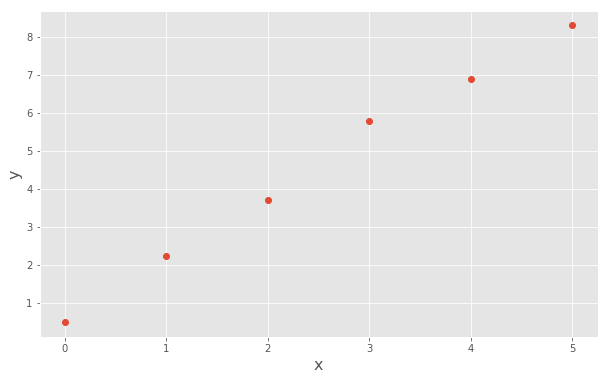

In [3]:
#create x- and y-values lying roughly along a straight line
xdata=np.array([0,1,2,3,4,5])
ydata=np.array([0.5,2.23,3.7,5.8,6.9,8.3])

#plot the data as a scatter plot
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(xdata,ydata,'o')
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
plt.show()

## 1.1 Defining our fit function
To fit our data, we need to define a model function. Since we are fitting a straight line, we will make use of the well known equation for such a line: $$y=mx+c$$
Where $x$ is the independent variable and $m$ (the gradient of the line) and $c$ (the y-intercept) are our fit parameters.

In [4]:
#define our model function (give it a sensible name), and declare the independent variable followed by the 
#fit parameters (x,m,c)

def linFit(x,m,c): #note the semi-colon at the end of this line
    return m*x+c   #equation for a straight line


## 1.2. Fitting the data
Now that we have defined our model function, we can use it to fit our data ($i.e.$ find the best values for $m$ and $c$). To do this, we use the "curve_fit" command:

In [5]:
#Use curve_fit command (part of scipy) to fit our data.
# Curve fit called with three arguments: the fit function (defined above), the x-data, and the y-values
popt,pcov=curve_fit(linFit,xdata,ydata) 

The curve fit command returns two arrays as output, which we have chosen to call ```popt``` and ```pcov```. The 'popt' array contains the best-fit values for our fit-parameters (m and c). The order in which they appear in the array is the same as the order in which they were defined in the original fit function ('m' then 'c' in this case). We can view the best-fit values using the ```print(popt)``` command:

In [6]:
print(popt)

[1.57457143 0.63523811]


From this we can see that the gradient of our line is 1.57, with a y-intercept of 0.64. A simple way to check the quality of the fit is to plot the line of best fit over the original data:

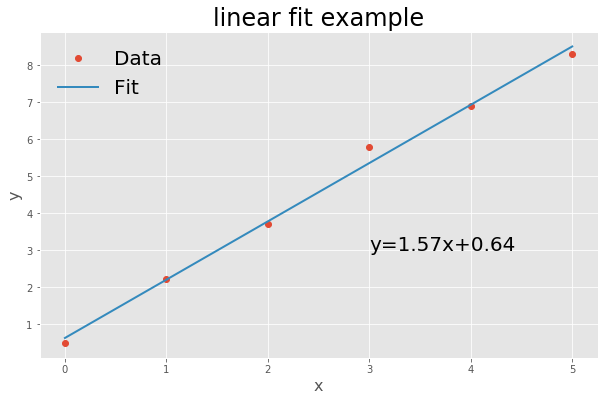

In [7]:
#Generate the line of best fit - y=mx+c:
y_fit=popt[0]*xdata+popt[1] #popt[n] returns the nth value in the popt array (remember that python counts from zero)

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(xdata,ydata,'o',label='Data') #original data
ax.plot(xdata,y_fit,lw=2,label='Fit') #line of best fit 

ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_title('linear fit example',fontsize=24)
ax.text(3,3,"y={:4.2f}x+{:4.2f}".format(popt[0],popt[1]),fontsize=20) #include the line equation on the plot
plt.legend(fontsize=20,frameon=False)
plt.show()

## 1.3. What about 'pcov'?
The 'pcov' array generated above is the covariance matrix for the fit. In general, it will be a $n\times n$ array, where $n$ is the number of fit-parameters in the model function (in our example it is a $2\times 2$ array): 

In [8]:
print(pcov)

[[ 0.00378239 -0.00945599]
 [-0.00945599  0.03467195]]


The one standard deviation errors in our best-fit values can be extracted from the covariance matrix by taking the square-root of the diagonal elements using the ```np.sqrt(np.diag(ArrayName))``` command:

In [9]:
Uncertainty=np.sqrt(np.diag(pcov)) #np.diag extracts the diagonal elements of an array

print('Gradient={:4.2f}, 1 S.D. uncertainty={:4.2f}'.format(popt[0],Uncertainty[0]))
print('Intercept={:4.2f}, 1 S.D. uncertainty={:4.2f}'.format(popt[1],Uncertainty[1]))

Gradient=1.57, 1 S.D. uncertainty=0.06
Intercept=0.64, 1 S.D. uncertainty=0.19


Its always a good idea to look at the off-diagonal elements of the covariance matrix too. These numbers tell you the degree of correlation between your fit parameters. Ideally you want these to be close to zero (this tells you that your fit parameters are independent of each other). Values approaching $\pm1$ indicate that the reliabaility of the fit is poor.

<div class=warn>

### <font>Task 1:</font>
Fit the following data to a straight line (use the ```linFit()``` function defined above). Determine the best-fit values for the gradient of the line, and their associated one standard deviation errors. Plot the results of your fit, and report the best-fit values for $m$ and $c$ along with their one standard-deviation uncertaities.


In [10]:
#Task 1 data:
x=np.array([0,1,2,3,4,5])
y=np.array([0.2,2.7,4.9,7.3,8.7,11.4])

#Task 1 answer:

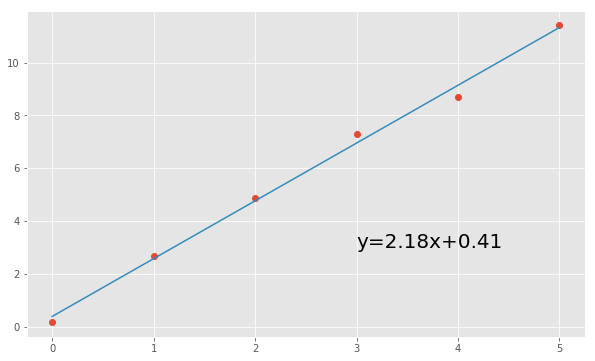

Gradient=2.18, 1 S.D. uncertainty=0.07
Intercept=0.41, 1 S.D. uncertainty=0.23


In [11]:
popt,pcov=curve_fit(linFit,x,y)
yfit=popt[0]*x+popt[1]

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(x,y,'o',x,yfit)
ax.text(3,3,"y={:4.2f}x+{:4.2f}".format(popt[0],popt[1]),fontsize=20)
plt.show()

Uncertainty=np.sqrt(np.diag(pcov)) #np.diag extracts the diagonal elements of an array

print('Gradient={:4.2f}, 1 S.D. uncertainty={:4.2f}'.format(popt[0],Uncertainty[0]))
print('Intercept={:4.2f}, 1 S.D. uncertainty={:4.2f}'.format(popt[1],Uncertainty[1]))


# 2. Non-linear Curve FItting
Oftentimes our data is not going to lie on a straight line, and so we need to fit it to a more complicated, non-linear, function. We achieve this in largely the same manner as we used for straight line fits.

Lets demonstrate this by fitting a randomly generated sine curve $y=\sin(ax+b)$:

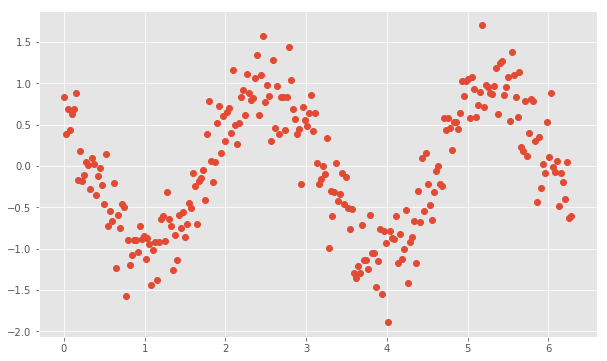

In [12]:
#generate noisy sine curve with random frequency (a) and phase (b)
a=np.random.uniform(1.5,2.5) #Random number between 1.5 and 2.5
b=np.random.uniform(0,np.pi) #Random number between 0 and pi

xdata=np.linspace(0,2*np.pi,256)
ydata=np.sin(a*xdata+b)
noise=np.random.normal(size=xdata.size)*0.3 #Add some random 'noise' to the sine curve
y_noise=ydata+noise

#Plot the sine curve
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(xdata,y_noise,'o')
plt.show()

## 2.1. Defining the fit function
Our first step is to define the model function we are using for the fit:
$$y=\sin(ax+b)$$

In [13]:
#define our model function (sineFit), and declare the independent variable, x, followed 
#by the two fit parameters, a & b

def sineFit(x,a,b): 
    return np.sin(a*x+b)

## 2.2. Initial fit-paramater guesses
The only difference between linear and non-linear fits is that we need to provide ```curve_fit``` with initial guesses for the fit parameters a and b. We do this by creating an array and filling it with our initial guesses:

In [14]:
guessParams=[2.0,1.8] #our guessed values for a and b - if these are too far out the fit will not work

It is always a good idea to plot our trial function against the original data to see if our initial guesses are reasonable:

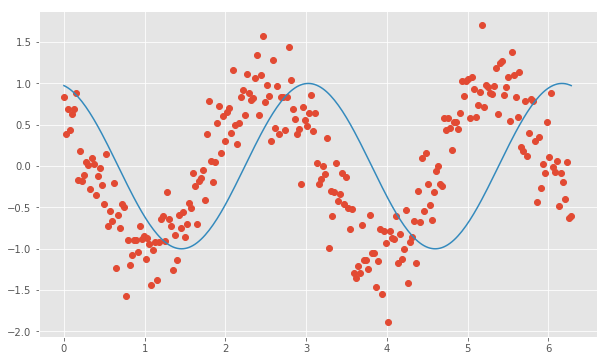

In [15]:
#Create our trial function using our initial guesses for omega and phi
y_trial=np.sin(guessParams[0]*xdata+guessParams[1])

#plot the trial function against the original data to see if our guesses are reasonable
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(xdata,y_noise,'o')
ax.plot(xdata,y_trial)

plt.show()

## 2.3. Curve fitting
If our guesses look good, then we can proceed with the curve fitting, elsewise we need to adjust the values contained in the ```guessParams``` array.

The actual data-fitting process is nearly identical to that used in the example of a straight line fit. The only difference is that we need to include a new argument in the ```curve_fit``` command, to let it know the location of our initial fit-parameter guesses:

In [16]:
#use the 'curve_fit' module to fit our data (xdata,y_noise) using our user defined fit function (sineFit) with the 
#initial guesses provided in guessParams.
#popt contains the best-fit parameters, pcov can be used for error analysis
popt, pcov = curve_fit(sineFit, xdata, y_noise, guessParams) #guessParams is the only new argument from above

Plotting the resultant line of best fit shows if we have been successful.

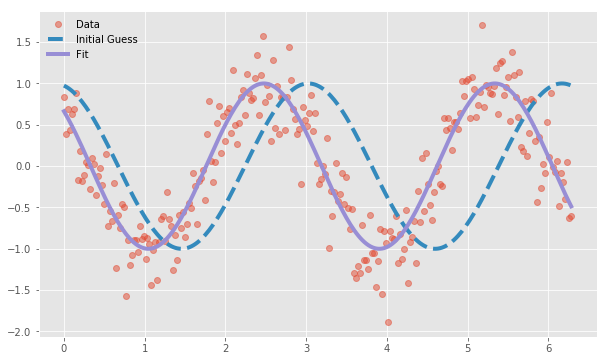

a(data)=2.19; a(fit)=2.20, 1 S.D. uncertainty=0.014
b(data)=2.37; b(fit)=2.42, 1 S.D. uncertainty=0.050


In [17]:
#Generate line of best fit
y_fit=np.sin(popt[0]*xdata+popt[1])

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(xdata,y_noise,'o',alpha=0.5,label='Data') #Noisy sine curve
ax.plot(xdata,y_trial,'--',lw=4,label='Initial Guess') #Sine curve generated using our guessed values for a and b
ax.plot(xdata,y_fit,label='Fit',lw=4) #Fitted sine curve

ax.legend(frameon=False)
plt.show()

#Extract one standard deviation uncertainties for a and b from covariance matrix
err=np.sqrt(np.diag(pcov))

#compare the actual (randomly generated) values for a and b with those returned by the fit
print('a(data)={:4.2f}; a(fit)={:4.2f}, 1 S.D. uncertainty={:4.3f}'.format(a,popt[0],err[0]))
print('b(data)={:4.2f}; b(fit)={:4.2f}, 1 S.D. uncertainty={:4.3f}'.format(b,popt[1],err[1]))

<div class=warn>

### <font>Task 2:</font>
The data in the code box below describes an exponential decay obeying the function:
$$y=e^{-kx}+c$$
Define a fit function and use it to fit the data. Plot the results of your fit, and report the best-fit values for $k$ and $c$ along with their one standard-deviation uncertaities.

In [18]:
#x- and y-values for task2:
xdata=np.array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
       1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
       2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
       3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
       4.16666667, 4.375     , 4.58333333, 4.79166667, 5.        ])
ydata=np.array([2.29571132, 2.07101355, 1.86747534, 1.7982708 , 1.6465569 ,
       1.55285214, 1.51899243, 1.47650864, 1.38996595, 1.35309758,
       1.3564634 , 1.34031022, 1.3479142 , 1.30895075, 1.32096505,
       1.33756549, 1.27642251, 1.32362688, 1.24847808, 1.30583286,
       1.32490246, 1.28569048, 1.32053396, 1.29062279, 1.30465078])

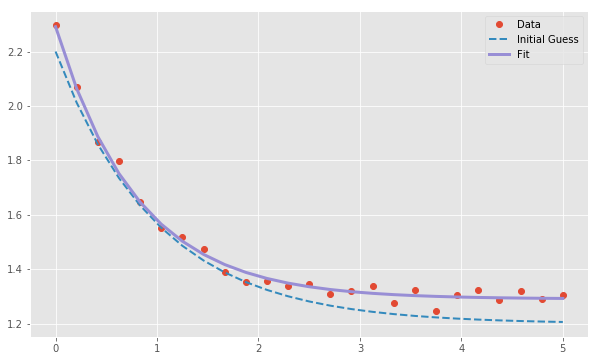

k=1.24, 1 S.D uncertainty=0.05
c=1.29, 1 S.D uncertainty=0.01


In [19]:
#Task2 answer:
def expFit(x,k,c):
    return np.exp(-k*x)+c

guessParams=[1,1.2]

popt,pcov=curve_fit(expFit,xdata,ydata,guessParams)

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(xdata,ydata,'o',label='Data')
ax.plot(xdata,np.exp(-guessParams[0]*xdata)+guessParams[1],'--',lw=2,label='Initial Guess')
ax.plot(xdata,np.exp(-popt[0]*xdata)+popt[1],lw=3,label='Fit')
ax.legend()
plt.show()

err=np.sqrt(np.diag(pcov))
print('k={:4.2f}, 1 S.D uncertainty={:4.2f}'.format(popt[0],err[0]))
print('c={:4.2f}, 1 S.D uncertainty={:4.2f}'.format(popt[1],err[1]))

<div class=warn>

### <font>Task 3:</font>
The data in the file ```overlappingPeaks.csv``` describes a common situation in vibronic spectroscopy - that of overlapping spectral features:

In [20]:
#Read in the data using pandas
data=pd.read_csv('./STUFF/overlappingPeaks.csv')
data.head()

,Wavenumber,Intensity
0,1725.048924,0.013397
1,1725.146771,0.067653
2,1725.244618,-0.043927
3,1725.342466,-0.029030
4,1725.440313,0.074036


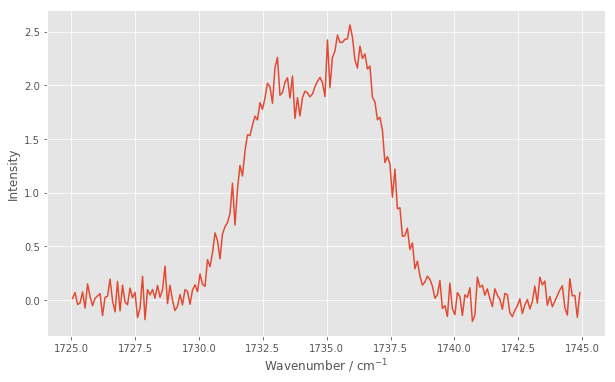

In [21]:
#Plot the data
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(data['Wavenumber'],data['Intensity'])
ax.set_xlabel('Wavenumber / cm$^{-1}$')
ax.set_ylabel('Intensity')
plt.show()

<div class=warn>
 
### <font>Task 3 (continued):</font> 
We can decompose these overlapping peaks using model functions (<i>c.f.</i> dashed lines in the video at the beginning of this notebook) to get the individual peak centres, peak widths, and peak intensities. In solution, vibrational line shapes are described by Gaussian functions:

$$y=A\exp\left(-\left\{\frac{x-xc}{w}\right\}^{2}\right)$$

where $A$ is the peak height, $xc$ is the peak centre, and $w$ is the width. 

Since our simulated data consists of two peaks, our fit function will be the sum of two Gaussians:

$$y=A_{1}\exp\left(-\left\{\frac{x-xc_{1}}{w_{1}}\right\}^{2}\right)+A_{2}\exp\left(-\left\{\frac{x-xc_{2}}{w_{2}}\right\}^{2}\right)$$

Use this function to fit the spectral data. Plot the results of your fit, and report the best-fit values for the peak heights, widths, and peak centres along with their one standard-deviation uncertaities.

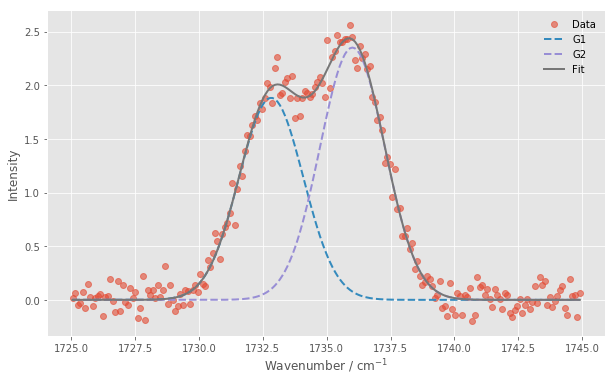

A1=1.88, 1 S.D uncertainty=0.04
x1=1732.83, 1 S.D uncertainty=0.06
w1=1.78, 1 S.D uncertainty=0.06
A2=2.35, 1 S.D uncertainty=0.04
x2=1736.01, 1 S.D uncertainty=0.05
w2=1.79, 1 S.D uncertainty=0.05


In [22]:
def multiGauss(x,A1,x1,w1,A2,x2,w2): #independent variable and 6 fit parameters
    return (A1*np.exp(-((x-x1)/w1)**2))+(A2*np.exp(-((x-x2)/w2)**2))

guessParams=[2.0,1733,2,2.2,1736,2]

popt,pcov=curve_fit(multiGauss,data['Wavenumber'],data['Intensity'],guessParams)

#Prepare our two Gaussian model functions fit plotting
G1=popt[0]*np.exp(-((data['Wavenumber']-popt[1])/popt[2])**2)
G2=popt[3]*np.exp(-((data['Wavenumber']-popt[4])/popt[5])**2)

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(data['Wavenumber'],data['Intensity'],'o',alpha=0.6,label='Data')
ax.plot(data['Wavenumber'],G1,'--',lw=2,label='G1')
ax.plot(data['Wavenumber'],G2,'--',lw=2,label='G2')
ax.plot(data['Wavenumber'],G1+G2,lw=2,label='Fit')

ax.legend(frameon=False)
ax.set_xlabel('Wavenumber / cm$^{-1}$')
ax.set_ylabel('Intensity')
plt.show()

err=np.sqrt(np.diag(pcov))
print('A1={:4.2f}, 1 S.D uncertainty={:4.2f}'.format(popt[0],err[0]))
print('x1={:4.2f}, 1 S.D uncertainty={:4.2f}'.format(popt[1],err[1]))
print('w1={:4.2f}, 1 S.D uncertainty={:4.2f}'.format(popt[2],err[2]))

print('A2={:4.2f}, 1 S.D uncertainty={:4.2f}'.format(popt[3],err[3]))
print('x2={:4.2f}, 1 S.D uncertainty={:4.2f}'.format(popt[4],err[4]))
print('w2={:4.2f}, 1 S.D uncertainty={:4.2f}'.format(popt[5],err[5]))

# 3. Simultaneous fitting of multiple datasets

Task 3 introduced you to the concept of decomposing a vibronic spectrum into a series of model functions (in this case a different Gaussian for each vibrational peak). In a real time-resolved experiment, you would want to repeat this fit for every pump-probe time-delay, extract the peak areas (proportional to the concentration of the molecular species), and plot these concentrations as a function of pump-probe time delay. Since the primary photochemical pathways available to a molecule all obey first-order kinetics, these spectra will display exponential decay/growth curves.

## 3.1. A simple example: A &rarr; B first-order kinetics
For example, consider the case where our initially created species, $A^{*}$, has a single decay pathway open to it (this could be fluorescence back down to the ground electronic state, dissociation into fragments, internal conversion, <i>etc.</i>) with a rate coefficient $k$:

$$A^{*}\xrightarrow{k}B$$

The time-dependent concentrations of $A^{*}$ and $B$ are given by the following expressions (here we assume that only species $A^{*}$ is preset initially):

$$\begin{align*}
    [A^{*}]_{t}&=[A^{*}]_{0}e^{-kt}\\
    [B]_{t}&=[A^{*}]_{0}\left(1-e^{-kt}\right)
   \end{align*}$$
  
where $t$ is the pump/probe time delay, $[X]_{t}$ are the time-dependent concentrations of $A^{*}$ / $B$, and $[A^{*}]_{0}$ is the concentration of $A$ at $t=0$ (<i>i.e.</i> the total amount of $A^{*}$ created by the pump pulse). 

Some simulated data is shown below (to simplify things $[A^{*}]_{0}=1$):

In [23]:
#Read in the simulated data using pandas
data=pd.read_csv('./STUFF/AtoB.csv')
data.head()

,Time/s,Concentration A,Concentration B
0,0.000000,1.035930,0.001291
1,1.041667,0.828422,0.156790
2,2.083333,0.647986,0.354876
3,3.125000,0.594443,0.418997
4,4.166667,0.439750,0.533744


[]

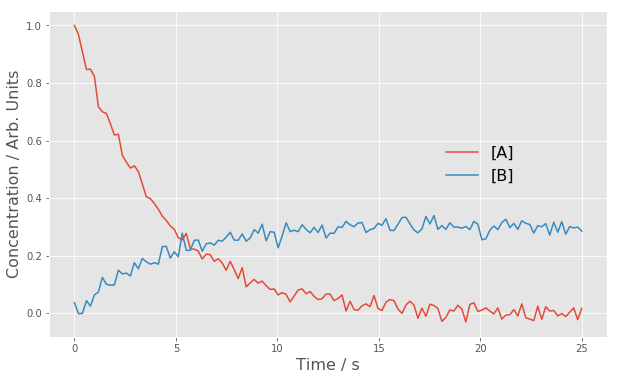

In [89]:
#Plot the simulated data
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(data['Time/s'],data['Concentration A'],label='[A]')
ax.plot(data['Time/s'],data['Concentration B'],label='[B]')

ax.set_xlabel('Time / s',fontsize=16)
ax.set_ylabel('Concentration / Arb. Units',fontsize=16 )
ax.legend(frameon=False,loc=(0.7,0.45),fontsize=16)

plt.plot()


We can fit both of these curves separately using the methodology outlined above:

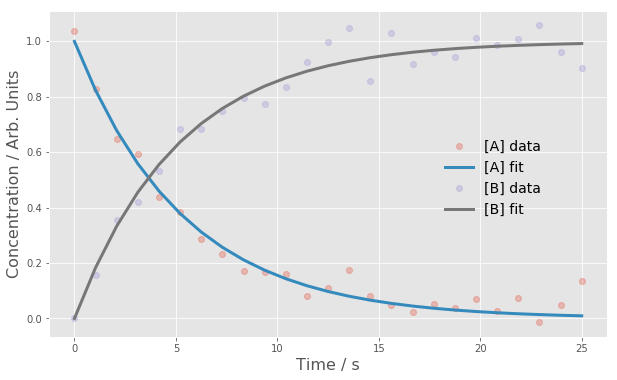

k (decay)=0.186, 1 S.D uncertainty=0.007
k (growth)=0.195, 1 S.D uncertainty=0.009


In [55]:
#Define two fit functions, one for the decay of A*, and one describing the growth of B
def expDecay(t,k):
    return np.exp(-k*t)

def expGrowth(t,k):
    return 1-np.exp(-k*t)

#initial guess for value of k 
guessParams=[0.5]

#Fit the two data sets independently
popt_decay,pcov_decay=curve_fit(expDecay,data['Time/s'],data['Concentration A'],guessParams) #[A] concentration
popt_growth,pcov_growth=curve_fit(expGrowth,data['Time/s'],data['Concentration B'],guessParams)#[B] concentration

#Plot the data
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(data['Time/s'],data['Concentration A'],'o',alpha=0.3,label='[A] data')
ax.plot(data['Time/s'],np.exp(-popt_decay[0]*data['Time/s']),lw=3,label= '[A] fit')
ax.plot(data['Time/s'],data['Concentration B'],'o',alpha=0.3,label='[B] data')
ax.plot(data['Time/s'],1-np.exp(-popt_growth[0]*data['Time/s']),lw=3,label= '[B] fit')

ax.set_xlabel('Time / s',fontsize=16)
ax.set_ylabel('Concentration / Arb. Units',fontsize=16 )
ax.legend(frameon=False,loc=(0.7,0.35),fontsize=14)

plt.show()

#print the best-fit parameters
err_decay=np.sqrt(np.diag(pcov_decay))
err_growth=np.sqrt(np.diag(pcov_growth))
print('k (decay)={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt_decay[0],err_decay[0]))
print('k (growth)={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt_growth[0],err_growth[0]))


The above fits have returned two different values for the same rate coefficient $k$! This is a common occurance because no experiment is perfect. The noise in the two curves above caused the fits to converge to two (slightly) different solutions. Which value should we use?

We can avoid this problem by fitting both data sets simultaneously, thereby obtaining a single, global, best fit value for $k$. This approach bulids upon that used above, but we need to add in a couple of new steps.

We begin by defining our fit functions in the usual manner:

In [26]:
#Define two fit functions, one for the decay of A*, and one describing the growth of B
def expDecay(t,k):
    return np.exp(-k*t)

def expGrowth(t,k):
    return 1-np.exp(-k*t)

We now have to combine all of our concentration data into a single numpy array. This is achieved using the ```np.append(dataset1,dataset2)``` command. This step needs to be repeated for the 'Time / s' data:

In [27]:
#create single numpy array containing all the concentration data, A followed by B
ConcA_B=np.append(data['Concentration A'],data['Concentration B'])

#create single numpy array containing all the time data (append 'Time/s' to itself)
TimeA_B=np.append(data['Time/s'],data['Time/s'])

We now need to define a new function which handles the simultaneous fit of all the data:

In [28]:
#define our simultaneous fit function (simFit), and declare the independent variable, comboData, followed 
#by the single fit parameter, k

def simFit(comboData,k):
#split our independent varible back into its original arrays
    extract1=comboData[:len(data['Concentration A'])] #takes the first n points from the array (n=length of 'Concentration A')
    extract2=comboData[len(data['Concentration B']):] #takes the last n points from the array (n=length of 'Concentration B')

#Fit the two extracted waves using their respective fit functions
    result1=expDecay(extract1,k) #'A' data
    result2=expGrowth(extract2,k) #'B' data
    
    return np.append(result1,result2)

As before, we need to supply an initial guess for the single fit parameter (we know from above that $k\approx 0.2$)

In [29]:
guessParams=[0.2]

We call the ```curve_fit``` function in the ususal manner, supplying the simultaneous fit function, combined x-data, combined y-data, and the fit parameter guesses as arguments:

In [30]:
#Fit the data to the simultaneous fit function (simFit) using the combined x-data (TimeA_B), 
#combined y-data (ConcA_B), and our guessed fit parameters (guessParams)
popt,pcov=curve_fit(simFit,TimeA_B,ConcA_B,guessParams)

As usual, 'popt' contains the global best-fit value for $k$, and 'pcov' is related to its uncertainty:  

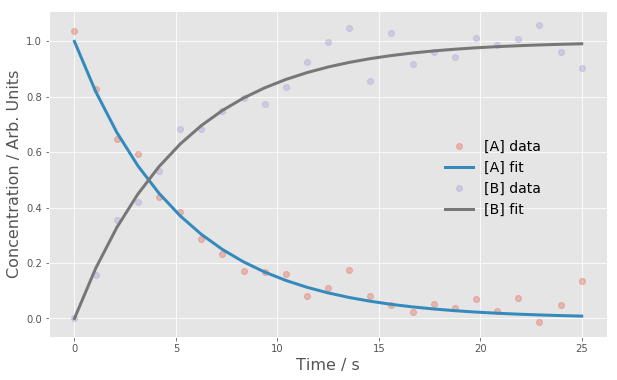

k =0.191, 1 S.D uncertainty=0.006


In [56]:
#plot the global best-fit line
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(data['Time/s'],data['Concentration A'],'o',alpha=0.3,label='[A] data')
ax.plot(data['Time/s'],np.exp(-popt[0]*data['Time/s']),lw=3,label= '[A] fit')
ax.plot(data['Time/s'],data['Concentration B'],'o',alpha=0.3,label='[B] data')
ax.plot(data['Time/s'],1-np.exp(-popt[0]*data['Time/s']),lw=3,label= '[B] fit')

ax.set_xlabel('Time / s',fontsize=16)
ax.set_ylabel('Concentration / Arb. Units',fontsize=16 )
ax.legend(frameon=False,loc=(0.7,0.35),fontsize=14)

plt.show()

#print the best-fit parameters
err=np.sqrt(np.diag(pcov))
print('k ={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt[0],err[0]))

From the above, we see that fitting the two data sets simultaneously reveals the best fit value for the rate coefficient to be $k=0.191\pm0.006 \textrm{s}^{-1}$

## 3.2. A more complicated example: consecutive first-order processes, A &rarr; B &rarr; C 

Consider the following series of irreversible chemical reactions:

$$A^{*}\xrightarrow{k_{1}}B\xrightarrow{k_{2}}C$$

These rate equations can be solved analytically. If we assume that at time $t=0$, $[A]=[A]_{0}$, and $[B]=[C]=0$, then the time dependent concentrations of $A,\,B$ and $C$ are given by:

$$[A]_t=[A]_{0}e^{-k_{1}t}$$

$$[B]_t=\frac{k_{1}[A]_{0}}{k_{2}-k_{1}}\left\{e^{-k_{1}t}-e^{-k_{2}t}\right\}$$

$$[C]_t=\left\{1+\frac{k_{1}e^{-k_{2}t}-k_{2}e^{-k_{1}t}}{k_{2}-k_{1}}\right\}[A]_{0}$$

Again, to simplify things we shall assume that $[A]_0=1$

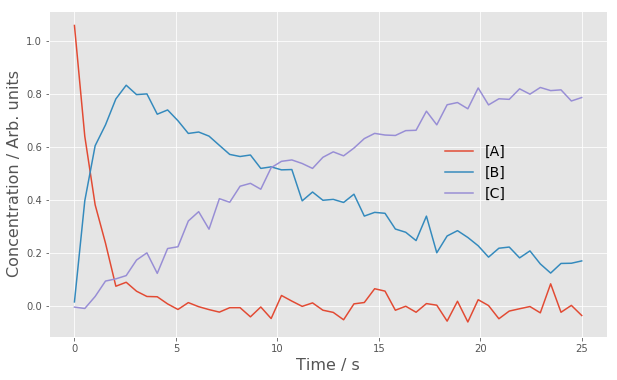

In [84]:
#Set up simulated data sets (with noise)
time=np.linspace(0,25,50)
k1=np.abs(np.random.normal()) #random number between 0 and 1
k2=np.abs(np.random.normal())

A=np.exp(-k1*time)+np.random.normal(size=len(time), scale=0.03)
B=(k1/(k2-k1))*(np.exp(-k1*time)-np.exp(-k2*time))+np.random.normal(size=len(time), scale=0.03)
C=1+((k1*np.exp(-k2*time)-k2*np.exp(-k1*time))/(k2-k1))+np.random.normal(size=len(time), scale=0.03)

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(time,A,label='[A]')
ax.plot(time,B,label='[B]')
ax.plot(time,C,label='[C]')

ax.legend(frameon=False,loc=(0.7,0.4),fontsize=14)
ax.set_xlabel('Time / s',fontsize=16)
ax.set_ylabel('Concentration / Arb. units',fontsize=16)
plt.show()

### 3.2.1. Defining the fit functions

As always, we first need to define our fit functions. In our kinetic scheme there are two fit parameters in total, $k_{1}$ and $k_2$. All three fit functions must include <i>both</i> of these in the fit arguments (the stuff enclosed in parentheses in the fit function definition), even if the function itself doesn't make use of all of them. For instance, the population of $A$ depends upon $k_{1}$ <b>only</b>, but the user defined fit function still needs to include $k_2$ in its initial definition ```def popA(x,k1,k2):```

In [85]:
#Define fit functions for three populations
#Each function must be called with all the fit parameters used in the global fit, not all parameters
#are used by each fit function
def popA(x,k1,k2): 
    return np.exp(-k1*x)

def popB(x,k1,k2):
    return (k1/(k2-k1))*(np.exp(-k1*x)-np.exp(-k2*x))

def popC(x,k1,k2):
    return 1+((k1*np.exp(-k2*x)-k2*np.exp(-k1*x))/(k2-k1))

Guess at the fit paramaters and check by plotting

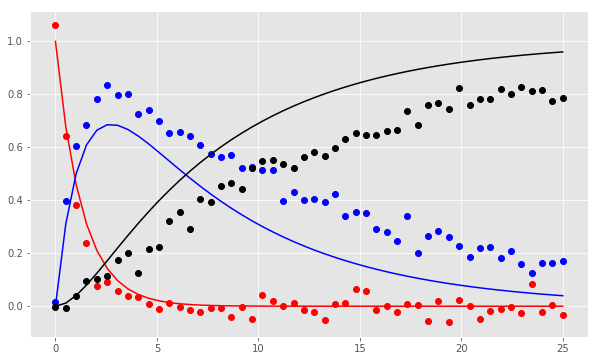

In [86]:
# Initial fit guesses
guessParams=[0.763,0.137]

#Test initial guesses
A_guess=np.exp(-guessParams[0]*time)
B_guess=(guessParams[0]/(guessParams[1]-guessParams[0]))*(np.exp(-guessParams[0]*time)-np.exp(-guessParams[1]*time))
C_guess=1+((guessParams[0]*np.exp(-guessParams[1]*time)-guessParams[1]\
            *np.exp(-guessParams[0]*time))/(guessParams[1]-guessParams[0]))

fig,ax=plt.subplots(figsize=(10,6))

ax.plot(time,A,'ro',time,A_guess,'r')
ax.plot(time,B,'bo',time,B_guess,'b')
ax.plot(time,C,'ko',time,C_guess,'k')
plt.show()

### 3.2.2. Preparing the data for fitting, and curve fitting

We need to combine all of the data into a single array, and pass this data to the global fit function ```simFit```:

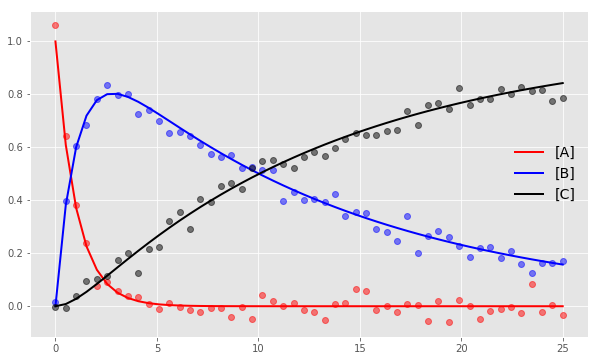

k1 =0.971, 1 S.D uncertainty=0.030
k2=0.077, 1 S.D uncertainty=0.001


In [87]:
#Combine all the concentrations into a single array
comboY=np.append(A,[B,C]) #append A to the beginning of the array formed by appending C to B
#repeat for the time data
comboX=np.append(time,[time,time])

#define out simultaneous fitting function. The arguments are the collated data and both of the fit parameters
def simFit(comboData,k1,k2):
    A_data=comboData[0:len(A)] #Extract the first data set from comboData
    B_data=comboData[len(A):2*len(A)] #Extract the second dataset (all our data sets are th esmae length)
    C_data=comboData[2*len(A):3*len(A)]
    
    result1=popA(A_data,k1,k2)
    result2=popB(B_data,k1,k2)
    result3=popC(C_data,k1,k2)
    
    return np.append(result1,[result2,result3])

#Fit the data 
popt,pcov=curve_fit(simFit,comboX,comboY,guessParams)

#Plot the data and best-fit curves 
A_fit=np.exp(-popt[0]*time)
B_fit=(popt[0]/(popt[1]-popt[0]))*(np.exp(-popt[0]*time)-np.exp(-popt[1]*time))
C_fit=1+((popt[0]*np.exp(-popt[1]*time)-popt[1]*np.exp(-popt[0]*time))/(popt[1]-popt[0]))

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(time,A,'ro',alpha=0.5)
ax.plot(time,A_fit,'r',lw=2,label='[A]')
ax.plot(time,B,'bo',alpha=0.5)
ax.plot(time,B_fit,'b',lw=2,label='[B]')
ax.plot(time,C,'ko',alpha=0.5)
ax.plot(time,C_fit,'k',lw=2,label='[C]')

plt.legend(frameon=False,fontsize=14)
plt.show()

#Determine the 1 S.D. errors and print along with the best fit vlaues for k1 and k2
err=np.sqrt(np.diag(pcov))
print('k1 ={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt[0],err[0]))
print('k2={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt[1],err[1]))

<div class=warn>

### <font>Task 4:</font>
### Parallel first order processes: A&rarr; B; A&rarr; C

Consider the situation where our initially excited species can decay via two different pathways (<i>e.g.</i> fluorescence and intersystem crossing) simultaneously:

$$A^{*}\xrightarrow{k_{1}}B$$
and
$$A^{*}\xrightarrow{k_{2}}C$$

The solutions to this kinetic system (if we once again assume that at time $t=0$, $[A]=[A]_{0}=1$, and $[B]=[C]=0$) are:

$$[A]_t=e^{-(k_{1}+k_{2})t}$$

$$[B]_t=\frac{k_{1}}{k_{1}+k_{2}}\left(1-e^{-(k1 + k2)t}\right)$$

$$[C]_t=\frac{k_{2}}{k_{1}+k_{2}}\left(1-e^{-(k1 + k2)t}\right)$$

The data in the file ```parallelDecay.csv``` contains some simulated data: 

In [88]:
#Read in the data
data=pd.read_csv('./STUFF/parallelDecay.csv')
data.head()

,Time/s,Concentration A,Concentration B,Concentration C
0,0.000,1.000,0.036,0.017
1,0.197,0.969,-0.002,0.045
2,0.394,0.908,-0.001,0.042
3,0.591,0.847,0.043,0.102
4,0.787,0.848,0.024,0.136


[]

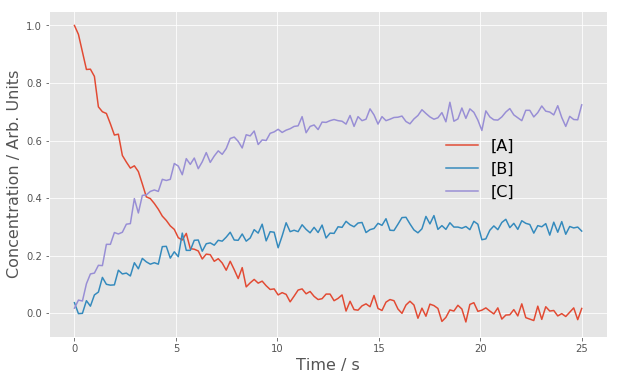

In [91]:
#Plot the simulated data

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(data['Time/s'],data['Concentration A'],label='[A]')
ax.plot(data['Time/s'],data['Concentration B'],label='[B]')
ax.plot(data['Time/s'],data['Concentration C'],label='[C]')

ax.set_xlabel('Time / s',fontsize=16)
ax.set_ylabel('Concentration / Arb. Units',fontsize=16 )
ax.legend(frameon=False,loc=(0.7,0.4),fontsize=16)

plt.plot()

<div class=warn>

### <font>Task 4 (continued):</font>

Using this data and the expressions for $[A]_{t},\,[B]_{t}$ and $[C]_{t}$ above, simultaneously fit all three data sets to extract the global best-fit values for $k_{1}$ and $k_{2}$. Plot the results of your fit, and report the best-fit values for $k_{1}$ and $k_{2}$ along with their one standard-deviation uncertaities.

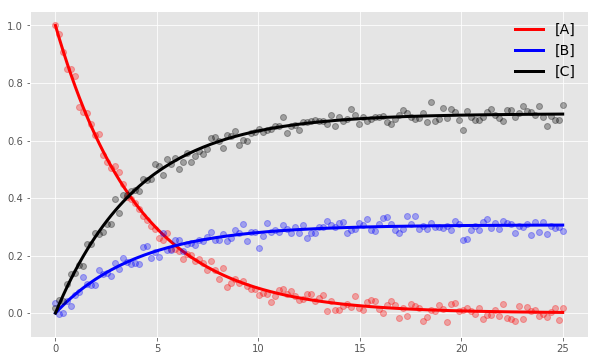

k1 =0.075, 1 S.D uncertainty=0.001
k2=0.170, 1 S.D uncertainty=0.001


In [118]:
#Task 4 answer
#Define the three individual fit functions
def popA(x,k1,k2):
    return np.exp(-(k1+k2)*x)
                  
def popB(x,k1,k2):
    return (k1/(k1+k2))*(1-np.exp(-(k1+k2)*x))

def popC(x,k1,k2):
    return (k2/(k1+k2))*(1-np.exp(-(k1+k2)*x))

#Define the simultaneous fit function
def simFit(comboData,k1,k2):
    A_data=comboData[0:len(data['Time/s'])] #Extract the first data set from comboData
    B_data=comboData[len(data['Time/s']):2*len(data['Time/s'])] #Extract the second dataset (all our data sets are the same length)
    C_data=comboData[2*len(data['Time/s']):3*len(data['Time/s'])]
    
    result1=popA(A_data,k1,k2)
    result2=popB(B_data,k1,k2)
    result3=popC(C_data,k1,k2)
    
    return np.append(result1,[result2,result3])

##Combine all the concentrations into a single array
comboY=np.append(data['Concentration A'],[data['Concentration B'],data['Concentration C']]) #append A to the beginning of the array formed by appending C to B
#repeat for the time data
comboX=np.append(data['Time/s'],[data['Time/s'],data['Time/s']])

#Initial guesses
guessParams=[0.1,0.2]

#Fit the data 
popt,pcov=curve_fit(simFit,comboX,comboY,guessParams)

#Plot the data and best fit curves
A_fit=np.exp(-(popt[0]+popt[1])*data['Time/s'])
B_fit=(popt[0]/(popt[0]+popt[1]))*(1-np.exp(-(popt[0]+popt[1])*data['Time/s']))
C_fit=(popt[1]/(popt[0]+popt[1]))*(1-np.exp(-(popt[0]+popt[1])*data['Time/s']))

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(data['Time/s'],data['Concentration A'],'ro',alpha=0.3,label='_nolegend_')
ax.plot(data['Time/s'],A_fit,'r',lw=3,label='[A]')
ax.plot(data['Time/s'],data['Concentration B'],'bo',alpha=0.3,label='_nolegend_')
ax.plot(data['Time/s'],B_fit,'b',lw=3,label='[B]')
ax.plot(data['Time/s'],data['Concentration C'],'ko',alpha=0.3,label='_nolegend_')
ax.plot(data['Time/s'],C_fit,'k',lw=3,label='[C]')

plt.legend(frameon=False,fontsize=14)
plt.show()

#Determine the 1 S.D. errors and print along with the best fit vlaues for k1 and k2
err=np.sqrt(np.diag(pcov))
print('k1 ={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt[0],err[0]))
print('k2={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt[1],err[1]))
